### Load data

In [1]:
import pandas as pd
import numpy as np
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from lightgbm.sklearn import LGBMClassifier

In [2]:
# Load dataset 
df = joblib.load('df_stability.pkl')

# Define features and target variable
features = joblib.load('features.pkl')

print('No. of features', len(features))

df.head()

No. of features 1857


,sym_x,sym_y,sym_z,mirror_x,mirror_y,mirror_z,trans_x,trans_y,trans_z,inverse_x,...,glide_y_ohe_b,glide_y_ohe_c,glide_y_ohe_d,glide_y_ohe_n,glide_z_ohe_a,glide_z_ohe_c,glide_z_ohe_d,glide_z_ohe_e,glide_z_ohe_n,stability
task_id,,,,,,,,,,,,,,,,,,,,,
mp-1,4.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
mp-10,4.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
mp-100,4.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
mp-1000,4.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
mp-10004,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
target = 'stability'
print(target)

stability


### Split & Scale Features

In [4]:
!cd

c:\Users\songy\OneDrive\Documents\GBSFS4MPP_local\new_properties\8 other_properties\stability


In [5]:
# Split dataset
df_train, df_test = train_test_split(
                                    df, 
                                    test_size=0.2, 
                                    stratify=df[target].tolist(), 
                                    random_state=42
                                    ) 

In [6]:
# Save unscaled data
joblib.dump(df_train, target + '_results/' + 'df_train_' + str(target) + '.pkl')
joblib.dump(df_test, target + '_results/' + 'df_test_' + str(target) + '.pkl')

['stability_results/df_test_stability.pkl']

In [7]:
# Scale the features
scaling = MinMaxScaler(feature_range=(0, 1))

df_train[features] = pd.DataFrame(
                                    scaling.fit_transform(df_train[features].values),
                                    columns=df_train[features].columns,
                                    index=df_train[features].index
                                )
                                

# Create pandas.Dataframe of scaled test set using scaler as defined using training set                           
df_test[features] = pd.DataFrame(
                                    scaling.transform(df_test[features].values),
                                    columns=df_test[features].columns,
                                    index=df_test[features].index
                                )

c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [8]:
# Save 
joblib.dump(df_train, target + '_results/' + 'df_train_' + str(target) + '_scaled.pkl')
joblib.dump(df_test, target + '_results/' +  'df_test_' + str(target) + '_scaled.pkl')

['stability_results/df_test_stability_scaled.pkl']

#### GBFS

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import GBFS as gb

import joblib
import pandas as pd

In [2]:
# Target
target = 'stability'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/stability/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + str(target) + '_scaled.pkl'

# Either a list or saved file
features = path + 'features.pkl'

problem = 'classification'

In [3]:
# Initialization 
FS = gb.GBFS(
            path_to_file = path_to_file, 
            path_to_save = path_to_save, 
            target = target,
            features = features,
            oversampled_it = True, 
            problem = problem,
            target_classes=2
            )

Name of target column:  stability
No. of exploratory features:  1857


In [4]:
# Conduct grid search to perform preliminary scan of the hyperparameter space & retrieve a trained model
FS.run(
        boosting_method = 'lightGBM', 
        objective='binary', 
        oversample_technique='smoothed_ros',
        cv_folds = 10
        )

Model employed:  lightGBM
Total no. of permutations: 8


   (1 of 8)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 20)]
   No. of rows in the training set: 30858

   Oversampling training data...
   No. of rows in training set after oversampling: 33632
   Metric score:  0.50000
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations


   (2 of 8)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 30)]
   No. of rows in the training set: 30858

   Oversampling training data...
   No. of rows in training set after oversampling: 33632
   Metric score:  0.50000


   (3 of 8)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.2), ('num_leaves', 20)]
   No. of rows in the training set: 30858

   Oversampling training data...
   No. of rows in training set after oversampling: 33632
   Metric score:  0.50012
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations

LGBMClassifier(importance_type='gain', learning_rate=0.2, n_estimators=200,
               num_leaves=30, objective='binary')

Result saved as: feature_relevance_score_stability.pkl
Figure saved as: feature_relevance_plot_stability.png


,feature,relevance_score
0,13,8360.133118
1,density,3440.900652
2,252,2497.459934
3,Rh.1,1587.525786
4,441,1586.209843
...,...,...
1852,660,0.000000
1853,661,0.000000
1854,662,0.000000
1855,663,0.000000


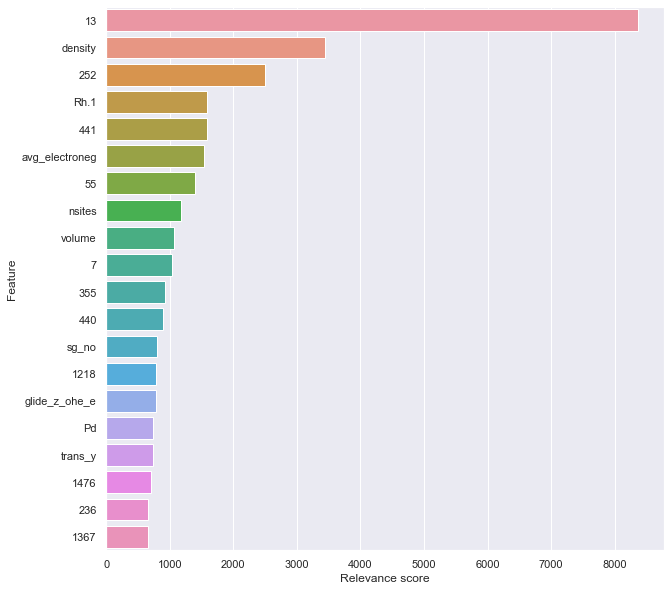

In [5]:
# Obtain feature relevance score
FS.feature_relevance(
                    plot = True, 
                    no_of_features = 20
                    )

In [6]:
# Perform recursive feature selection 
FS.recursive_selection(
                    stratify = True, 
                    oversample_technique = 'smoothed_ros', 
                    chosen_metric = 'f1_score',
                    average = 'weighted',
                    no_to_terminate = 150,
                    max_no_imp = 10
                    )

   No. of rows in training set:  30858
No. of features considering:  1

n=1: train_acc=0.6009, validation_acc=0.5798 

n=1: train_b_acc=0.5683, validation_b_acc=0.5431 

n=1: train_hl=0.3991 validation_hl=0.4202 

n=1: train_f1=0.5363, validation_f1=0.4903 

n=1: train_roc_auc=0.5734, validation_roc_auc=0.5390 

n=1: train_avg_precision)=0.5864, validation_avg_precision)=0.5717 

--- 0.5274794101715088 seconds --- 

No. of features considering:  2

n=2: train_acc=0.6478, validation_acc=0.5978 

n=2: train_b_acc=0.6357, validation_b_acc=0.5821 

n=2: train_hl=0.3522 validation_hl=0.4022 

n=2: train_f1=0.6406, validation_f1=0.5845 

n=2: train_roc_auc=0.7108, validation_roc_auc=0.6381 

n=2: train_avg_precision)=0.7498, validation_avg_precision)=0.6885 

--- 0.38234734535217285 seconds --- 

No. of features considering:  3

n=3: train_acc=0.7471, validation_acc=0.6761 

n=3: train_b_acc=0.7409, validation_b_acc=0.6682 

n=3: train_hl=0.2529 validation_hl=0.3239 

n=3: train_f1=0.7455, v

,train_acc,validation_acc,train_b_acc,validation_b_acc,train_hamming,validation_hamming,train_avg_precision,validation_avg_precision,train_roc_auc,validation_roc_auc,train_f1,validation_f1
no_of_features,,,,,,,,,,,,
1,0.600881,0.579780,0.568266,0.543050,0.399119,0.420220,0.586359,0.571710,0.573357,0.538967,0.536294,0.490285
2,0.647838,0.597797,0.635650,0.582071,0.352162,0.402203,0.749774,0.688543,0.710796,0.638073,0.640591,0.584536
3,0.747067,0.676086,0.740874,0.668181,0.252933,0.323914,0.868691,0.792273,0.839267,0.747486,0.745475,0.673233
4,0.746614,0.679456,0.740476,0.671320,0.253386,0.320544,0.869038,0.792171,0.840266,0.747071,0.745049,0.676434
5,0.794705,0.702009,0.789799,0.695207,0.205295,0.297991,0.904722,0.816967,0.882911,0.777372,0.793770,0.699980
...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.948344,0.739339,0.948176,0.727676,0.051656,0.260661,0.991807,0.852552,0.989776,0.824223,0.948357,0.733765
146,0.950807,0.747894,0.950706,0.736746,0.049193,0.252106,0.992244,0.872134,0.990406,0.843295,0.950821,0.742894
147,0.947372,0.743227,0.947284,0.732535,0.052628,0.256773,0.991754,0.863830,0.989775,0.835094,0.947389,0.738559


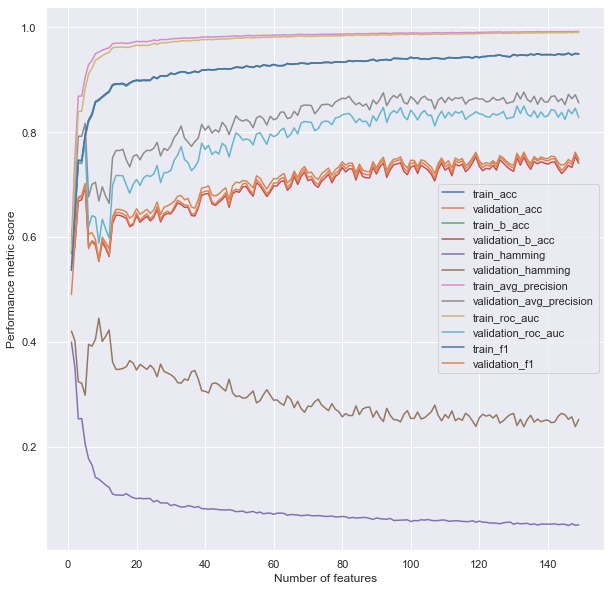

Result saved as: GBFS_convergence_plot_stability.png


<Figure size 720x720 with 0 Axes>

In [7]:
# Plot the result
FS.convergence_plot()

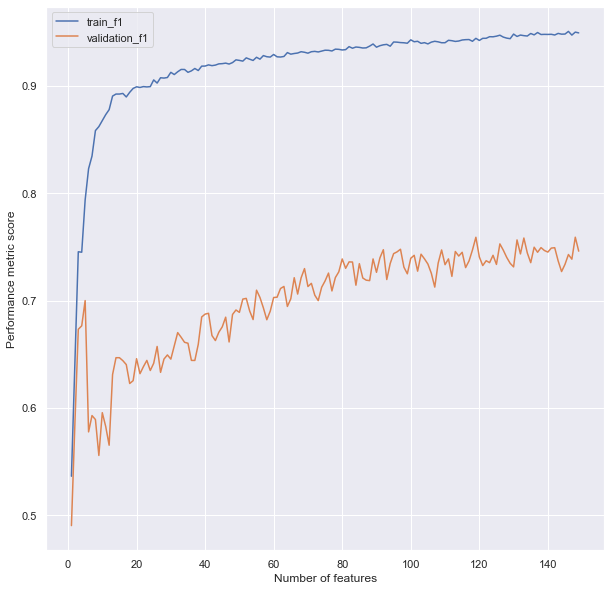

Result saved as: GBFS_convergence_plot_stability.png


<Figure size 720x720 with 0 Axes>

In [8]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_f1',
                    validation_metric = 'validation_f1'
                    )

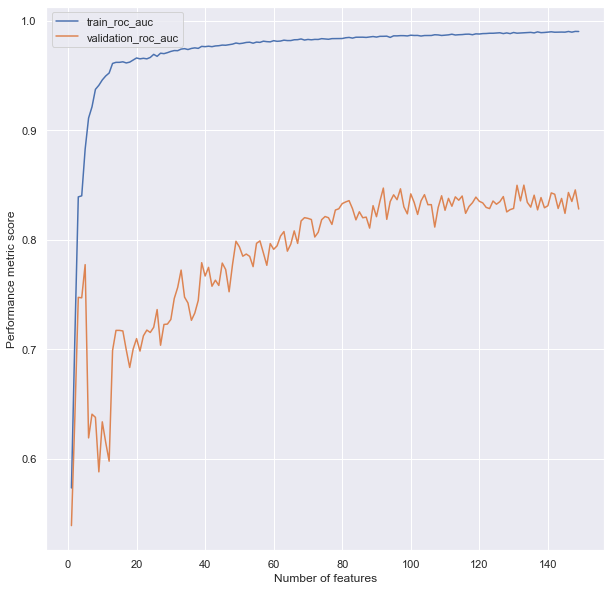

Result saved as: GBFS_convergence_plot_stability.png


<Figure size 720x720 with 0 Axes>

In [9]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_roc_auc',
                    validation_metric = 'validation_roc_auc'
                    )

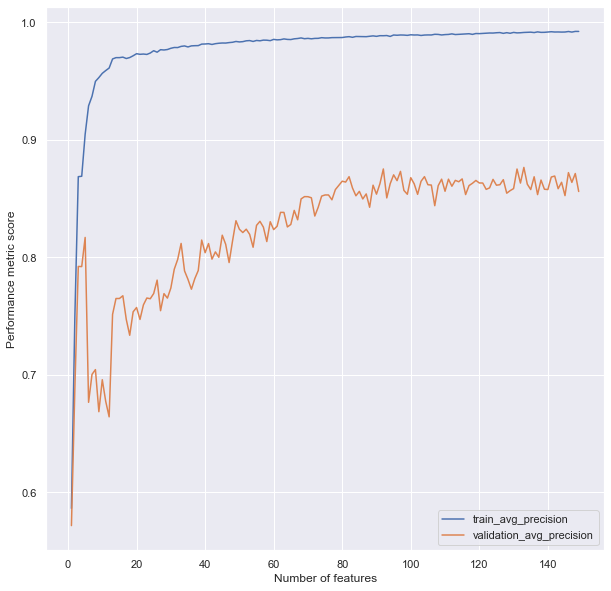

Result saved as: GBFS_convergence_plot_stability.png


<Figure size 720x720 with 0 Axes>

In [10]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_avg_precision',
                    validation_metric = 'validation_avg_precision'
                    )

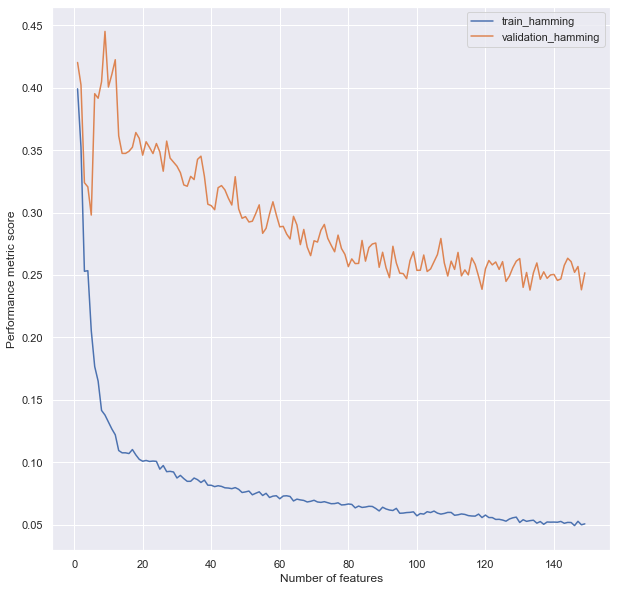

Result saved as: GBFS_convergence_plot_stability.png


<Figure size 720x720 with 0 Axes>

In [11]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_hamming',
                    validation_metric = 'validation_hamming'
                    )

In [ ]:
# # Plot the result
# FS.convergence_plot(
#                     train_metric = ['train_r_sq', 'train_rmse', 'train_mae'],
#                     validation_metric = ['va_r_sq', 'va_rmse', 'va_mae']
#                     )

##### Statistical Analyses - Classification

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_analyses as fa

import joblib
import pandas as pd

In [2]:
# Target
target = 'stability'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/stability/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + str(target) + '_scaled.pkl'

# Either a list or saved file
features = path + 'features.pkl'

problem = 'classification'

In [3]:
# Initialization 
analyses = fa.perform(
                    path_to_file = path_to_file, 
                    path_to_save = path_to_save, 
                    target = target,
                    features = features
                    )

Name of target column:  stability
No. of exploratory features:  1857


In [4]:
df = analyses.remove_constant_features()
df.head()

No. of features removed:  97
No. of exploratory features:  1760


,sym_x,sym_y,sym_z,mirror_x,mirror_y,mirror_z,trans_x,trans_y,trans_z,inverse_x,...,glide_y_ohe_b,glide_y_ohe_c,glide_y_ohe_d,glide_y_ohe_n,glide_z_ohe_a,glide_z_ohe_c,glide_z_ohe_d,glide_z_ohe_e,glide_z_ohe_n,stability
task_id,,,,,,,,,,,,,,,,,,,,,
mp-1184662,0.6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
mp-1184561,0.6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
mp-704251,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
mp-769462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
mp-1096364,0.2,0.5,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [5]:
df_anova = analyses.ANOVA_F_test(
                                problem=problem, 
                                all_features=True, 
                                csv=False
                                )

df_anova

There are:
No. of categorical features:  28
No. of numerical features:  1732 

Considering all features. 

Result saved as:  ANOVA_F_test_result_stability_classification.pkl


,feature_names,f_statistic,f_statistic_scaled
0,density,2252.722706,1.000000e+00
1,439,2132.965123,9.468387e-01
2,441,1815.194628,8.057781e-01
3,6,1551.820061,6.888642e-01
4,482,1541.980127,6.844962e-01
...,...,...,...
1755,Os.1,0.004850,2.142553e-06
1756,glide_y_ohe_a,0.001720,7.531742e-07
1757,V,0.000045,9.531521e-09
1758,889,0.000043,8.755888e-09


In [6]:
df_chi2 = analyses.chi2_test(csv=False)

df_chi2

There are:
No. of categorical features:  28
Result saved as: chi_squared_test_result_stability .pkl


,feature_names,chi_squared,chi_squared_scaled
0,bravais_ohe_F,784.089477,1.000000
1,crystal_system_ohe_triclinic,475.304281,0.606186
2,glide_x_ohe_n,443.868313,0.566094
3,bravais_ohe_I,404.608450,0.516023
4,crystal_system_ohe_cubic,284.060458,0.362281
5,glide_z_ohe_a,258.917256,0.330214
6,glide_y_ohe_c,95.513546,0.121815
7,crystal_system_ohe_monoclinic,38.832202,0.049525
8,crystal_system_ohe_trigonal,23.074200,0.029428
9,bravais_ohe_R,22.120255,0.028211


In [7]:
df_mi = analyses.mutual_information(
                                problem=problem, 
                                csv=False
                                )

df_mi 

There are:
No. of categorical features:  28
No. of numerical features:  1732 

Result saved as: MI_result_stability.pkl


,feature_names,MI,MI_scaled
0,8,0.130319,1.000000
1,208,0.129818,0.996155
2,191,0.128497,0.986017
3,328,0.127329,0.977052
4,383,0.127242,0.976389
...,...,...,...
1726,Na,0.000000,0.000000
1727,Np.1,0.000000,0.000000
1728,Pa.1,0.000000,0.000000
1729,Pb.1,0.000000,0.000000


In [9]:
df_ld = analyses.logistic_discrimination(
                                        target_classes=2, 
                                        class_names=['Stable', 'Unstable'], 
                                        csv=False
                                        )

df_ld

Result saved as: logistic_discrimination_result_stability.pkl


,feature_names,coefficient
0,sym_x,1.073260
1,sym_y,-0.213582
2,sym_z,-0.000988
3,mirror_x,-0.305769
4,mirror_y,-0.194946
...,...,...
1755,1483,-0.547903
1756,1484,-0.499002
1757,1485,0.041551
1758,1486,-0.166935


#### Feature Engineering 

In [10]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_engineering as fe

import joblib
import pandas as pd
import numpy as np

In [11]:
# Target
target = 'stability'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/stability/'
path_to_save = path + target + '_results/'
path_to_file = path + 'df_stability.pkl'  # all data

# Either a list or saved file
features = path + 'features.pkl'

problem = 'classification'

In [12]:
# Top n features from ANOVA 
df_anova = joblib.load(path_to_save + 'ANOVA_F_test_result_' + target + '_' + problem + '.pkl')

# Top n features
n = 5
anova_features = df_anova['feature_names'].tolist()[:n]

df_anova.iloc[:n, :]

,feature_names,f_statistic,f_statistic_scaled
0,density,2252.722706,1.000000
1,439,2132.965123,0.946839
2,441,1815.194628,0.805778
3,6,1551.820061,0.688864
4,482,1541.980127,0.684496


In [13]:
# Top n features from chi2 
df_chi2 = joblib.load(path_to_save + 'chi_squared_test_result_' + target + '.pkl')

# Top n features
n = 5
chi2_features = df_chi2['feature_names'].tolist()[:n]

df_chi2.iloc[:n, :]

,feature_names,chi_squared,chi_squared_scaled
0,bravais_ohe_F,784.089477,1.000000
1,crystal_system_ohe_triclinic,475.304281,0.606186
2,glide_x_ohe_n,443.868313,0.566094
3,bravais_ohe_I,404.608450,0.516023
4,crystal_system_ohe_cubic,284.060458,0.362281


In [14]:
# Top n features from MI 
df_mi = joblib.load(path_to_save + 'MI_result_' + target + '.pkl')

# Top n features
n = 5
mi_features = df_mi['feature_names'].tolist()[:n]

df_mi.iloc[:n, :]

,feature_names,MI,MI_scaled
0,8,0.130319,1.000000
1,208,0.129818,0.996155
2,191,0.128497,0.986017
3,328,0.127329,0.977052
4,383,0.127242,0.976389


In [15]:
# Top n features from LR 
df_ld = joblib.load(path_to_save + 'logistic_discrimination_result_' + target + '.pkl')

# Top and bottom n features
n = 2
df_ld = df_ld.sort_values('coefficient')
ld_features = df_ld['feature_names'].tolist()[:n] + df_ld['feature_names'].tolist()[-n:]

df_ld.iloc[:n, :], df_ld.iloc[-n:, :]

(    feature_names  coefficient
 658           386    -5.151484
 41             Fe    -4.626866,
     feature_names  coefficient
 65             Sn     3.548479
 132            Ts     3.677699)

In [16]:
# Top n features from GBFS
df_gbfs = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')

# Top n features
n = 5
gbfs_features = df_gbfs['feature'].tolist()[:n]

df_gbfs.iloc[:n, :]

,feature,relevance_score
0,13,8360.133118
1,density,3440.900652
2,252,2497.459934
3,Rh.1,1587.525786
4,441,1586.209843


In [17]:
# Initialization
perform = fe.engineering(
                        path_to_file = path_to_file, 
                        path_to_save = path_to_save, 
                        target = target,
                        features = features
                        )

Name of target column:  stability
No. of exploratory features:  1857


In [18]:
# Join the features
feature_list = anova_features + chi2_features + mi_features + ld_features + gbfs_features

print(len(feature_list))

24


In [19]:
# Perform feature engineering
df, new_cols = perform.brute_force(
                    feature_list = feature_list
                    )

df.head()

Total number of permutation: 552
Invalid operations: 88


,sym_x,sym_y,sym_z,mirror_x,mirror_y,mirror_z,trans_x,trans_y,trans_z,inverse_x,...,Rh.1/191,Rh.1/328,Rh.1/383,Rh.1/386,Rh.1/Fe,Rh.1/Sn,Rh.1/Ts,Rh.1/13,Rh.1/252,stability
task_id,,,,,,,,,,,,,,,,,,,,,
mp-1,4.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
mp-10,4.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
mp-100,4.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
mp-1000,4.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
mp-10004,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [20]:
perform.save()

Result saved as: df_stability_engineered_features.pkl
Result saved as: features_stability_engineered.pkl
Result saved as: df_train_stability_engineered.pkl
Result saved as: df_test_stability_engineered.pkl


#### Multi-Collinearity Reduction

In [21]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import multicollinearity_reduction as mr

import joblib
import pandas as pd
import numpy as np

In [22]:
# Target
target = 'stability'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/stability/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Features 
n = 150 # Most relevant features defined using the GBFS result
gbfs_cols = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')['feature'].tolist()[:n]
new_cols = joblib.load(path_to_save + 'features_' + target + '_engineered.pkl')
features = gbfs_cols + new_cols

problem = 'classification'

print('No. of columns from GBFS:', len(gbfs_cols))
print('No. of new columns:',len(new_cols))

len(features)

No. of columns from GBFS: 150
No. of new columns: 464


614

In [23]:
# Initialize module with path_to_file and path_to_save
data = mr.multicollinearity_reduction(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features 
                                        )

Name of target column:  stability
No. of exploratory features:  614


In [24]:
# Remove features with correlation coeff greather than the threshold
col_corr = data.correlation_analysis(threshold = 0.9)
new_features = data.apply_correlation_filter()

Identified correlated features
No. of features remaining:  363
Features saved as: features_selected_from_correlation_analysis_stability.pkl


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Figure saved as: Dendrogram_stability.png


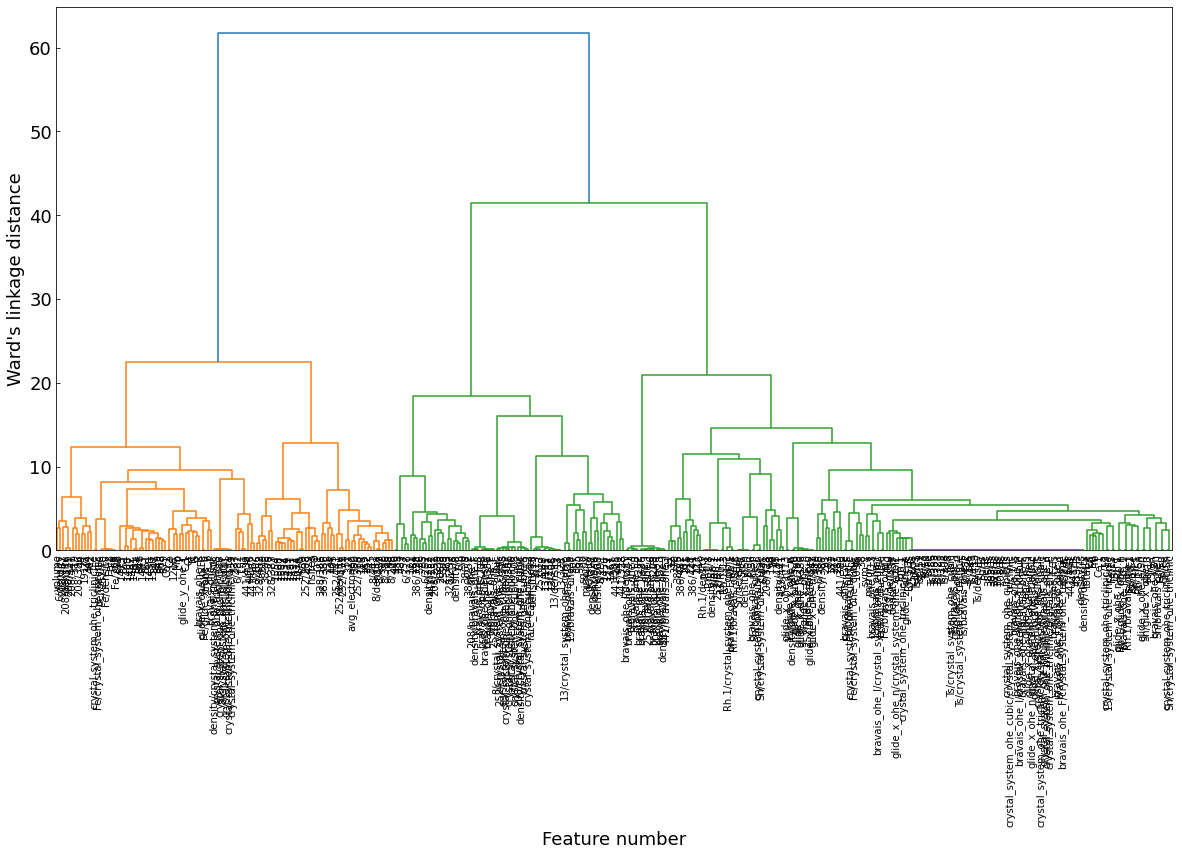

In [25]:
# Perform hierarchical cluster analysis & create the corresponding dendrogram 
data.hierarchical_cluster_analysis()

In [26]:
# Select features based on the given linkage threshold
threshold_list = [1, 2, 3, 4, 5, 6]

for i in threshold_list:
    final_features = data.apply_linkage_threshold(threshold = i)

Number of features remaining:  190
Features saved as features_selected_from_hierarchical_analysis_stability_threshold_1.pkl
Number of features remaining:  130
Features saved as features_selected_from_hierarchical_analysis_stability_threshold_2.pkl
Number of features remaining:  76
Features saved as features_selected_from_hierarchical_analysis_stability_threshold_3.pkl
Number of features remaining:  49
Features saved as features_selected_from_hierarchical_analysis_stability_threshold_4.pkl
Number of features remaining:  31
Features saved as features_selected_from_hierarchical_analysis_stability_threshold_5.pkl
Number of features remaining:  26
Features saved as features_selected_from_hierarchical_analysis_stability_threshold_6.pkl


#### Test Dummy Model

In [27]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import jaccard_score, multilabel_confusion_matrix, roc_curve, roc_auc_score, \
                            auc, f1_score, classification_report, recall_score, precision_recall_curve, \
                            balanced_accuracy_score, confusion_matrix, accuracy_score, average_precision_score, \
                            hamming_loss, matthews_corrcoef

from lightgbm.sklearn import LGBMClassifier


In [36]:
# Target
target = 'stability'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/stability/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Data
df_train = joblib.load(path_to_save + 'df_train_' + target + '_engineered.pkl')
df_test = joblib.load(path_to_save + 'df_test_' + target + '_engineered.pkl')

problem = 'classification'

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_3.pkl')
len(features)

76

In [37]:
lgbm  = LGBMClassifier(
                        importance_type='gain',
                        objective='binary',
                        random_state=42,
                        learning_rate=0.1,
                        n_estimators=400,
                        num_leaves=40,
                        )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMClassifier(importance_type='gain', n_estimators=400, num_leaves=40,
               objective='binary', random_state=42)

In [38]:
# Predict
y_pred = lgbm.predict_proba(df_test[features])
y_pred_2 = lgbm.predict(df_test[features])
y_test = df_test[target]

# Generate table of results

# micro, macro, weighted
strategy = 'weighted'

print('1. The F-1 score of the model {}\n'.format(f1_score(y_test.ravel(), y_pred_2, average=strategy)))
print('2. The recall score of the model {}\n'.format(recall_score(y_test.ravel(), y_pred_2, average=strategy)))
print('3. Classification report \n {} \n'.format(classification_report(y_test.ravel(), y_pred_2, 
                                                                    target_names=['Stable', 'Unstable'],
                                                                    digits=3)))
print('4. Classification report \n {} \n'.format(multilabel_confusion_matrix(y_test.ravel(), y_pred_2)))
print('5. Confusion matrix \n {} \n'.format(confusion_matrix(y_test.ravel(), y_pred_2)))
print('6. Accuracy score \n {} \n'.format(accuracy_score(y_test.ravel(), y_pred_2)))
print('7. Balanced accuracy score \n {} \n'.format(balanced_accuracy_score(y_test.ravel(), y_pred_2)))

1. The F-1 score of the model 0.8290049232613376

2. The recall score of the model 0.8291165491497304

3. Classification report 
               precision    recall  f1-score   support

      Stable      0.816     0.804     0.810      4368
    Unstable      0.840     0.850     0.845      5276

    accuracy                          0.829      9644
   macro avg      0.828     0.827     0.827      9644
weighted avg      0.829     0.829     0.829      9644
 

4. Classification report 
 [[[4483  793]
  [ 855 3513]]

 [[3513  855]
  [ 793 4483]]] 

5. Confusion matrix 
 [[3513  855]
 [ 793 4483]] 

6. Accuracy score 
 0.8291165491497304 

7. Balanced accuracy score 
 0.8269774908563764 



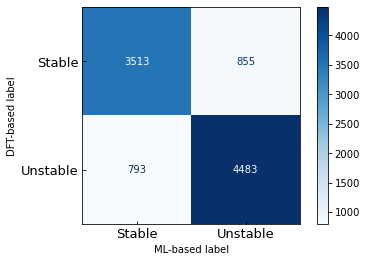

In [39]:
# np.set_printoptions(precision=2)
fontsize = 13
fontsize2 = 10

disp = plot_confusion_matrix(
                            lgbm, 
                            df_test[features], 
                            df_test[target],
                            display_labels=np.array(['Stable', 'Unstable'], dtype='<U10'),
                            cmap=plt.cm.Blues,
                            normalize=None
                            )


plt.tick_params(axis='both', which='major', labelsize=fontsize, direction='in')
plt.xlabel('ML-based label', size=fontsize2)
plt.ylabel('DFT-based label', size=fontsize2)

# #Final_figure
# plt.savefig('confusion_matrix_v3.png', dpi = 500, bbox_inches="tight")

plt.show()

#### Recursive Feature Elimination

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import recursive_feature_elimination as rfe

import joblib
import pandas as pd

In [2]:
# Target
target = 'stability'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/stability/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_2.pkl')
print(len(features))

scaled = False

problem = 'classification'

130


In [3]:
# Initialize module with path_to_file and path_to_save
run = rfe.recursive_feature_elimination(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features,
                                        scaled = False,
                                        problem = problem
                                        )

Target: stability
No. of features: 130


In [4]:
# Run RFE
estimator = run.base_model(boosting_method = 'lightGBM', objective='binary')
RFE_features = run.perform(cv_fold=10)

Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
Fitting estimator with 114 features.
Fitting estimator with 113 features.
Fitting estimator with 112 features.
Fitting estimator with 111 features.
Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
F

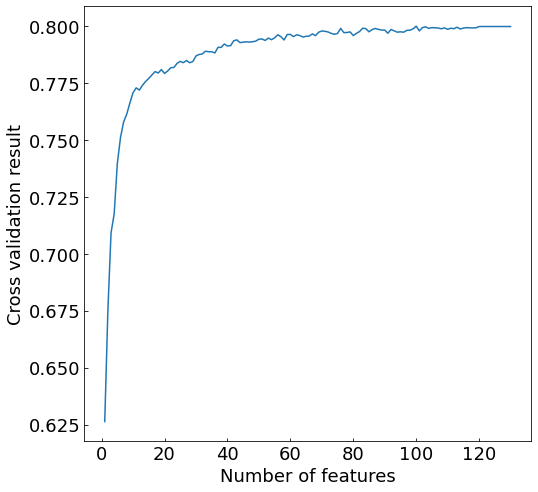

Figure saved as: RFE_plot_stability.png


In [5]:
# Plot figure
run.RFE_plot()

#### Bayesian Optimization 

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import optimization as opt

import joblib
import pandas as pd
import numpy as np

In [2]:
# Target
target = 'stability'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/stability/'
path_to_save = path + target + '_results/'

# Path to training data
path_to_train_data = path_to_save + 'df_train_' + target + '_engineered.pkl'
path_to_test_data = path_to_save + 'df_test_' + target + '_engineered.pkl'
path_to_features = path_to_save + 'features_selected_from_RFE_' + target + '.pkl' 

problem = 'classification'

scaled = False

In [3]:
# Initialization
final_stage = opt.optimization(
                            path_to_train_data = path_to_train_data,
                            path_to_test_data = path_to_test_data,
                            path_to_save = path_to_save,
                            features = path_to_features,
                            target = target,
                            problem = problem,
                            scaled = scaled
                            )

Name of target column:  stability
No. of exploratory features:  100


In [4]:
# Choose ML model
final_stage.base_model(boosting_method = 'lightGBM', objective='binary')

LGBMClassifier(importance_type='gain', objective='binary', random_state=42)

In [5]:
# Define hyperparameters; range should be edited directly from the script
final_stage.set_hyperparameters()

(['learning_rate', 'n_estimators', 'num_leaves'],
 [Real(low=0.01, high=1.0, prior='log-uniform', transform='identity'),
  Integer(low=100, high=800, prior='uniform', transform='identity'),
  Integer(low=10, high=100, prior='uniform', transform='identity')])

In [6]:
# optimization_method: dummy_minimize, gp_minimize, gbrt_minimize, forest_minimize
final_stage.run(optimization_method = 'bayesian')

Iteration No: 1 started. Evaluating function at random point.

 {'learning_rate': 0.01681215503421613, 'n_estimators': 710, 'num_leaves': 45} 

Score:  -0.8130085691366185 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 15.6803
Function value obtained: -0.8130
Current minimum: -0.8130
Iteration No: 2 started. Evaluating function at random point.

 {'learning_rate': 0.21905853791810648, 'n_estimators': 236, 'num_leaves': 39} 

Score:  -0.8294967972160687 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 5.1657
Function value obtained: -0.8295
Current minimum: -0.8295
Iteration No: 3 started. Evaluating function at random point.

 {'learning_rate': 0.1552409903424931, 'n_estimators': 483, 'num_leaves': 23} 

Score:  -0.8277089004580201 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 6.4729
Function value obtained: -0.8277
Current minimum: -0.8295
Iteration No: 4 started. Evaluating function at random point.

 {'learning_rate

Saved: Optimisation_result_stability.png


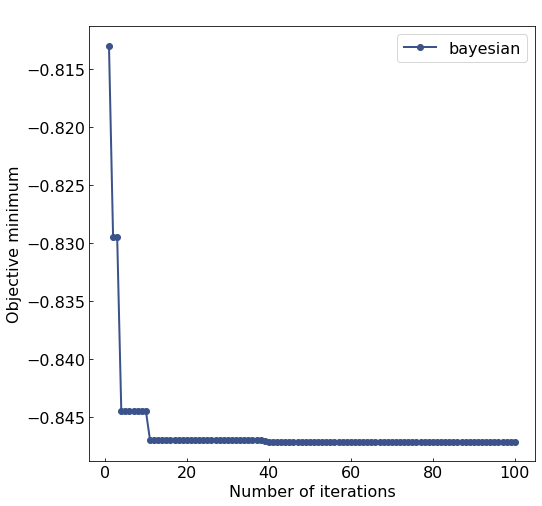

In [7]:
# Plot convergence plot
final_stage.convergence_plot()

<Figure size 720x720 with 0 Axes>

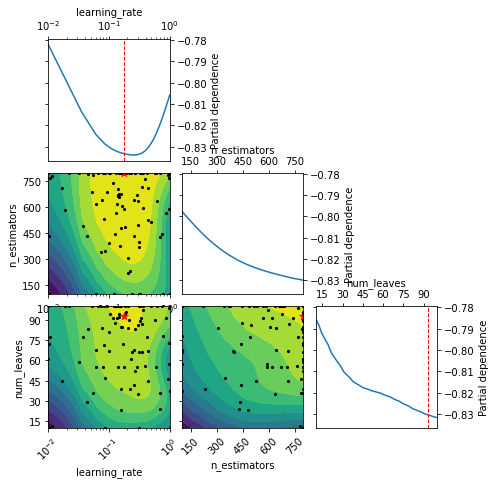

<Figure size 720x720 with 0 Axes>

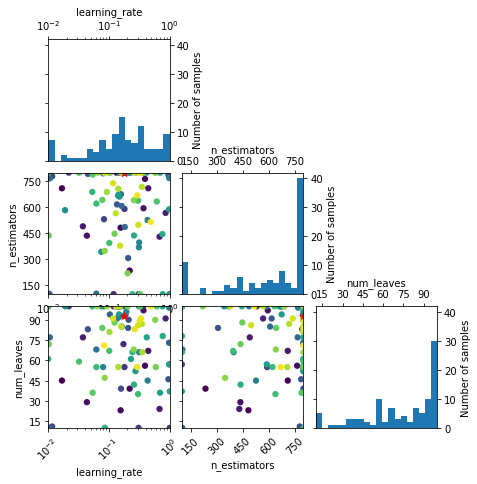

In [8]:
# objective and evaluation plot
final_stage.objective_plot()

In [9]:
# Train model with optimal hyperparameter identified
final_stage.train_model()

LGBMClassifier(importance_type='gain', learning_rate=0.17964036666170027,
               n_estimators=800, num_leaves=93, objective='binary',
               random_state=42)

1. The F-1 score of the model 0.8542379486667061

2. The recall score of the model 0.8542098714226461

3. Classification report 
               precision    recall  f1-score   support

      Stable       0.84      0.84      0.84      4368
    Unstable       0.87      0.86      0.87      5276

    accuracy                           0.85      9644
   macro avg       0.85      0.85      0.85      9644
weighted avg       0.85      0.85      0.85      9644
 

4. Classification report 
 [[[4563  713]
  [ 693 3675]]

 [[3675  693]
  [ 713 4563]]] 

5. Confusion matrix 
 [[3675  693]
 [ 713 4563]] 

6. Accuracy score 
 0.8542098714226461 

7. Balanced accuracy score 
 0.8531029480375576 



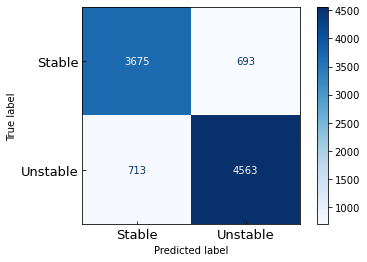

Saved: Confusion_matrix_stability.png


In [10]:
# Evaluate model using test set
final_stage.evaluate(
                    strategy='weighted', 
                    target_names=['Stable', 'Unstable']
                    )


roc_auc_score: 0.9280957405779715


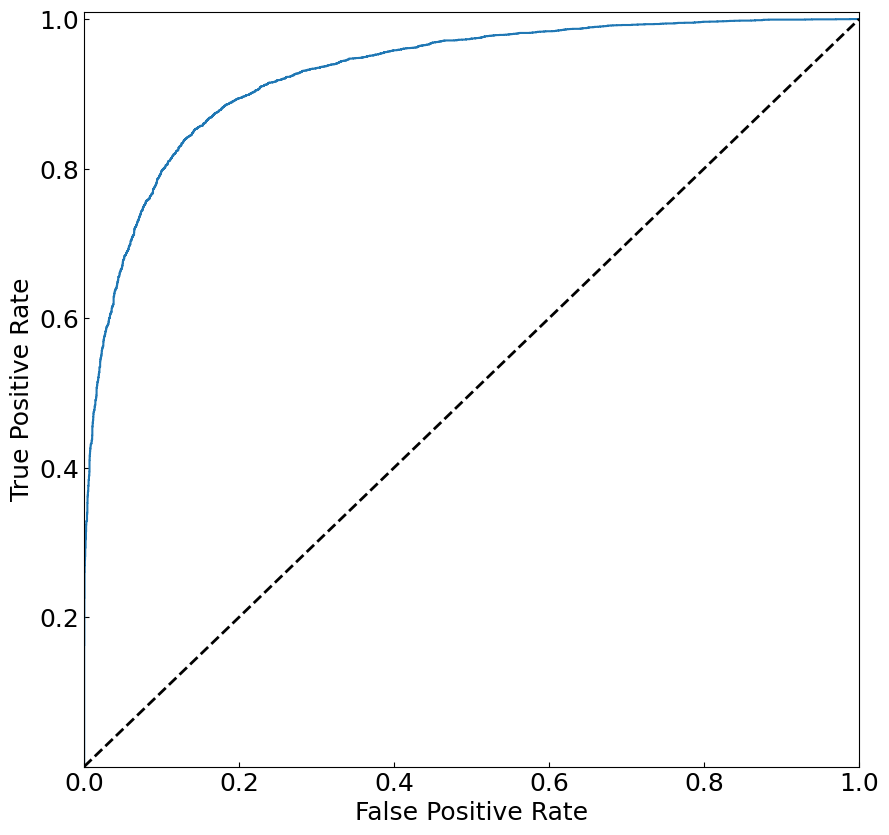

Saved: Receiver_operating_characteristic_curve_stability.png


In [17]:
# Evaluate model using test set
final_stage.ROC(
                overall_performance=True,
                strategy='macro',
                positive_class=1
                )

roc_auc_score: 0.9280957405779715


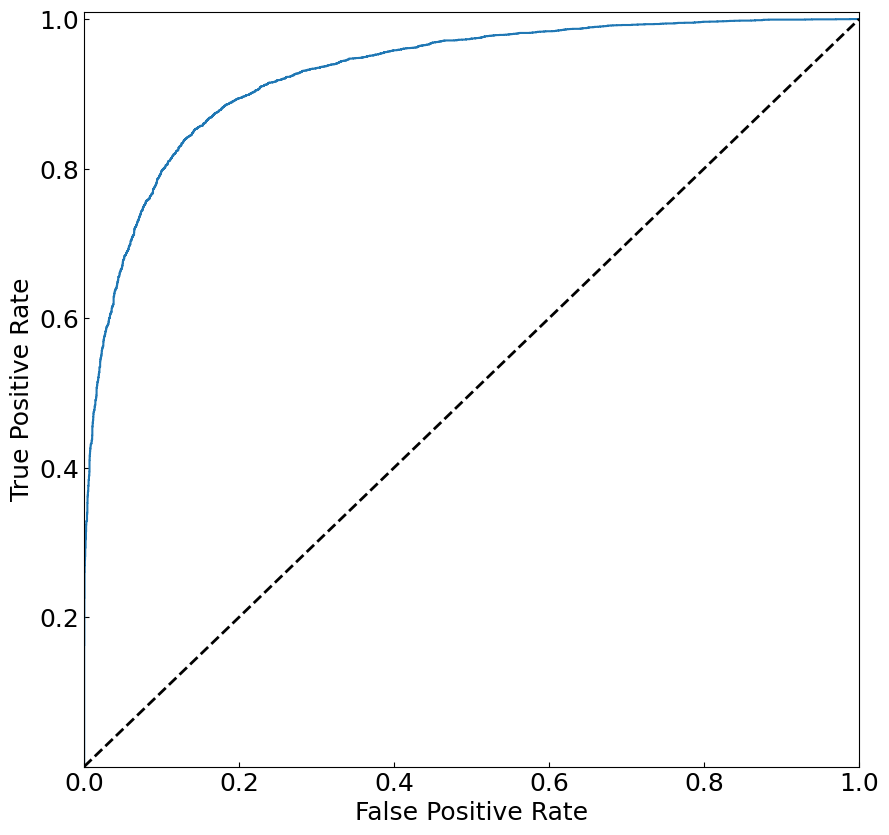

Saved: Receiver_operating_characteristic_curve_stability.png


In [19]:
# Evaluate model using test set
final_stage.ROC(
                overall_performance=True,
                strategy='macro',
                positive_class=1
                )

Possible DET equal error rate (see the plot and find the correct value): [1.0, 0.18063, 0.13988, 0.09913, 0.01099, 0.14538, 0.33036, 0.19826, 0.03961, 0.02862, 0.05288, 0.00114, 0.01213, 0.14973, 0.12775, 0.087, 0.09799, 0.15751, 0.11676, 0.02312, 0.04625, 0.0815, 0.05174, 0.02976, 0.04075]


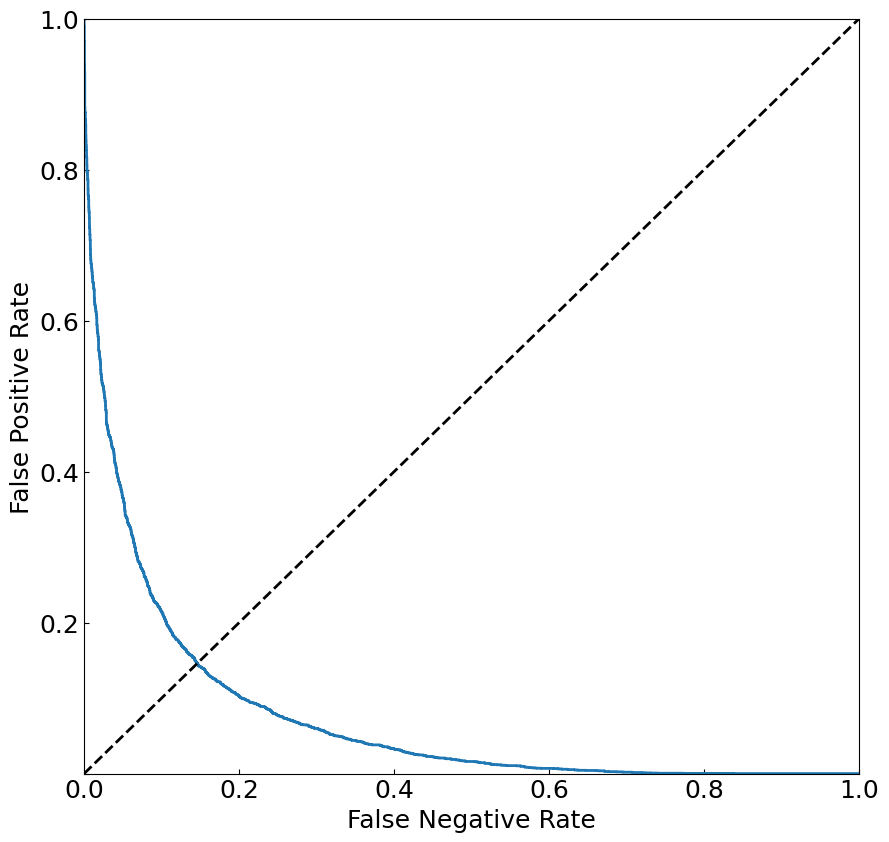

Saved: detection_error_tradeoff_curves_stability.png


In [20]:
# Evaluate model using test set
final_stage.DET(strategy='macro', positive_class=1)

average_precision: 0.9424513953982961


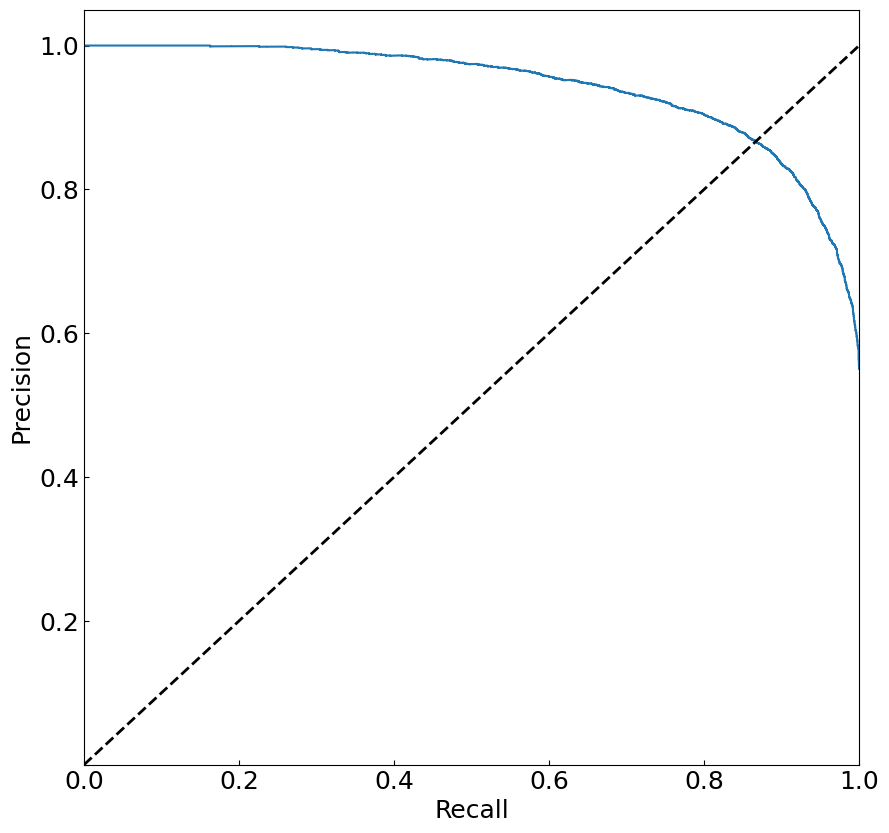

Saved: precision_recall_stability.png


In [21]:
# Evaluate model using test set
final_stage.PR(positive_class=1)

### Final Figure

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import jaccard_score, multilabel_confusion_matrix, roc_curve, roc_auc_score, \
                            auc, f1_score, classification_report, recall_score, precision_recall_curve, \
                            balanced_accuracy_score, confusion_matrix, accuracy_score, average_precision_score, \
                            hamming_loss, matthews_corrcoef

from lightgbm.sklearn import LGBMClassifier


In [2]:
# Target
target = 'stability'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/stability/'
path_to_save = path + target + '_results/'

# Path to training data
path_to_train_data = path_to_save + 'df_train_' + target + '_engineered.pkl'
path_to_test_data = path_to_save + 'df_test_' + target + '_engineered.pkl'
path_to_features = path_to_save + 'features_selected_from_RFE_' + target + '.pkl' 

problem = 'classification'

scaled = False

In [3]:
df_train = joblib.load(path_to_train_data)
df_test = joblib.load(path_to_test_data)

features = joblib.load(path_to_features)
len(features)

100

In [4]:
lgbm  = LGBMClassifier(
                        importance_type='gain',
                        objective='binary',
                        learning_rate=0.17964036666170027,
                        n_estimators=800,
                        num_leaves=93,
                        random_state=42
                        )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMClassifier(importance_type='gain', learning_rate=0.17964036666170027,
               n_estimators=800, num_leaves=93, objective='binary',
               random_state=42)

In [5]:
# Predict
y_pred = lgbm.predict_proba(df_test[features])
y_pred_2 = lgbm.predict(df_test[features])
y_test = df_test[target]

# Generate table of results

# micro, macro, weighted
strategy = 'weighted'

print('1. The F-1 score of the model {}\n'.format(f1_score(y_test.ravel(), y_pred_2, average=strategy)))
print('2. The recall score of the model {}\n'.format(recall_score(y_test.ravel(), y_pred_2, average=strategy)))
print('3. Classification report \n {} \n'.format(classification_report(y_test.ravel(), y_pred_2, 
                                                                    target_names=['Stable', 'Unstable'],
                                                                    digits=3)))
print('4. Classification report \n {} \n'.format(multilabel_confusion_matrix(y_test.ravel(), y_pred_2)))
print('5. Confusion matrix \n {} \n'.format(confusion_matrix(y_test.ravel(), y_pred_2)))
print('6. Accuracy score \n {} \n'.format(accuracy_score(y_test.ravel(), y_pred_2)))
print('7. Balanced accuracy score \n {} \n'.format(balanced_accuracy_score(y_test.ravel(), y_pred_2)))


1. The F-1 score of the model 0.8545664861806423

2. The recall score of the model 0.8545209456656989

3. Classification report 
               precision    recall  f1-score   support

      Stable      0.837     0.843     0.840      4368
    Unstable      0.869     0.864     0.867      5276

    accuracy                          0.855      9644
   macro avg      0.853     0.854     0.853      9644
weighted avg      0.855     0.855     0.855      9644
 

4. Classification report 
 [[[4558  718]
  [ 685 3683]]

 [[3683  685]
  [ 718 4558]]] 

5. Confusion matrix 
 [[3683  685]
 [ 718 4558]] 

6. Accuracy score 
 0.8545209456656989 

7. Balanced accuracy score 
 0.853544855132232 



In [6]:
from sklearn.metrics import roc_auc_score, matthews_corrcoef, average_precision_score

print(roc_auc_score(np.array(y_test.tolist()), y_pred[:, 1], average='macro'))


print(matthews_corrcoef(np.array(y_test.tolist()), y_pred_2))

y_test_2 = label_binarize(y_test, classes = list(range(2)))
print(average_precision_score(y_test_2, y_pred[:, 1], average="macro"))

0.9274996823684275
0.7066471512213217
0.9419269211128671


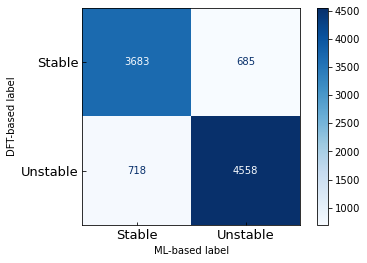

In [7]:
# np.set_printoptions(precision=2)
fontsize = 13
fontsize2 = 10

disp = plot_confusion_matrix(
                            lgbm, 
                            df_test[features], 
                            df_test[target],
                            display_labels=np.array(['Stable', 'Unstable'], dtype='<U10'),
                            cmap=plt.cm.Blues,
                            normalize=None
                            )


# disp.ax_.set_title('(d)', fontsize=fontsize, y=1.01) 

plt.tick_params(axis='both', which='major', labelsize=fontsize, direction='in')
plt.xlabel('ML-based label', size=fontsize2)
plt.ylabel('DFT-based label', size=fontsize2)

# #Final_figure
plt.savefig(path_to_save + 'confusion_matrix_v3.png', dpi = 500, bbox_inches="tight")

plt.show()

In [7]:
df_test.groupby([target]).count()

,sym_x,sym_y,sym_z,mirror_x,mirror_y,mirror_z,trans_x,trans_y,trans_z,inverse_x,...,Rh.1/208,Rh.1/191,Rh.1/328,Rh.1/383,Rh.1/386,Rh.1/Fe,Rh.1/Sn,Rh.1/Ts,Rh.1/13,Rh.1/252
stability,,,,,,,,,,,,,,,,,,,,,
0,4368,4368,4368,4368,4368,4368,4368,4368,4368,4368,...,4368,4368,4368,4368,4368,4368,4368,4368,4368,4368
1,5276,5276,5276,5276,5276,5276,5276,5276,5276,5276,...,5276,5276,5276,5276,5276,5276,5276,5276,5276,5276


[Text(0.5, 0, 'Relevance score'), Text(0, 0.5, 'Feature')]

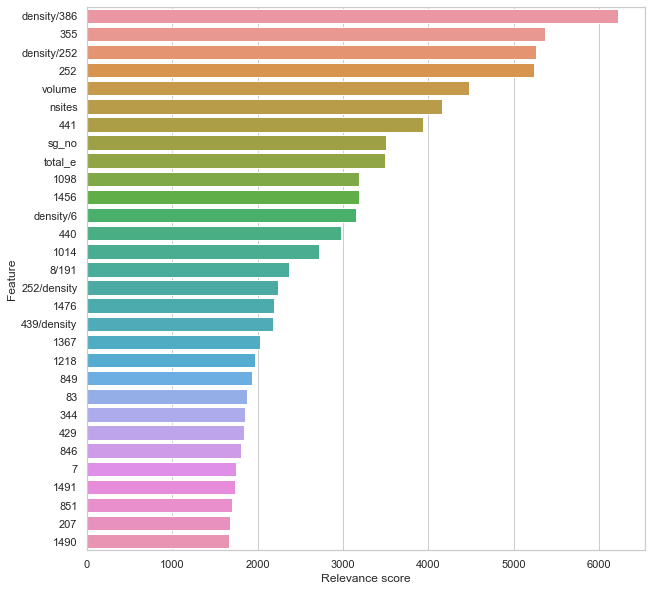

In [8]:
import seaborn as sns
# Generate feature ranking
model = lgbm

feature_score = pd.DataFrame({'feature': features, 'relevance_score': model.feature_importances_})
feature_score = feature_score.sort_values(by = 'relevance_score', ascending = False)
feature_score = feature_score.reset_index(drop = True)

#Plot data of feature relevance 
sns.set(rc = {'figure.figsize':(10, 10)})
sns.set_style("whitegrid")

# Number of features to plot
no_of_features = 30

fig = sns.barplot(x = 'relevance_score', y = 'feature', data = feature_score[:no_of_features])
fig.set(xlabel = 'Relevance score', ylabel = 'Feature')

# plt.savefig('feature_relevance_plot_experimental_bayesian_scaffold_split_v2.png', dpi = 300)